Pandas Assignment 

Haijing ZHU, Group Six

Topic: Is the birth rate in USA related to family income?

Data Source: https://fred.stlouisfed.org/. 

I collected several annual data on this topic, including the birth rates, real family income, GDP, CPI and unemployment rate in the United States from 1960 to 2012.

Explore the Data

In [374]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
data=pd.read_csv('/Users/zhuhaijing/Desktop/dataset.csv')
data.columns='date','birth rate','real family income','GDP','CPI','unemployment rate'

In [375]:
data.set_index('date', inplace=True)

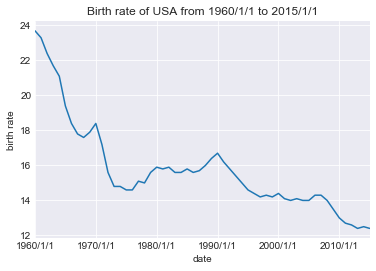

In [376]:
#Plot1: Line graph of birth rate in USA from 1960/1/1 to 2015/1/1
a=data['birth rate']
a.plot()
plt.ylabel("birth rate")
plt.title('Birth rate of USA from 1960/1/1 to 2015/1/1')
plt.show()

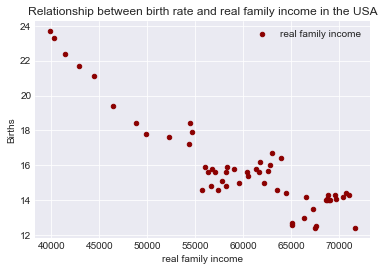

In [377]:
#Plot2:Scatter plot of birth rate and real family income in the USA 
a=data.plot(x='real family income', y='birth rate', kind='scatter',color='darkred',label='real family income')
plt.ylabel("Births")
plt.legend(loc='upper right')
plt.title('Relationship between birth rate and real family income in the USA')
plt.show()

In [378]:
data['real family income']=data['real family income']/1000

In [379]:
data['GDP']=data['GDP']/1000

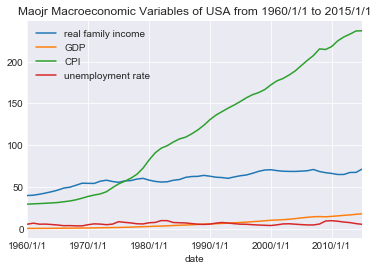

In [380]:
#Plot3:Plot of major Macroeconomic Variables of USA from 1960/1/1 to 2015/1/1
a=data[['real family income','GDP','CPI','unemployment rate']]
a.plot()
plt.title('Maojr Macroeconomic Variables of USA from 1960/1/1 to 2015/1/1')
plt.show()

Hypothesis: The birth rate of USA is negatively determined by real family income

Linear regression equation: birth rate = α + β * real family income + μ

In [381]:
data['constant']=1

In [383]:
import statsmodels.api as sm

reg = sm.OLS(endog=data['birth rate'], exog=data[['constant','real family income']],missing='drop')
results = reg.fit()
results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             birth rate   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     235.0
Date:                Sun, 28 Jan 2018   Prob (F-statistic):           2.56e-21
Time:                        21:02:13   Log-Likelihood:                -85.857
No. Observations:                  56   AIC:                             175.7
Df Residuals:                      54   BIC:                             179.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
constant              32.7374      1

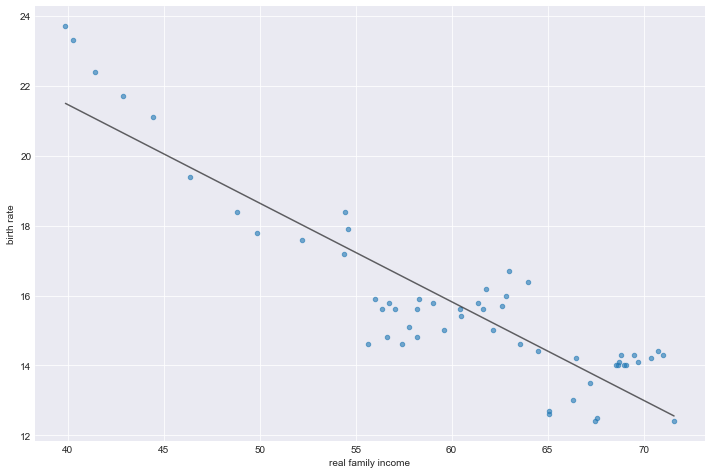

In [384]:
data.plot(x='real family income', y='birth rate', kind='scatter', alpha=0.6, figsize=(12, 8))
plt.ylabel('birth rate')
plt.plot(np.unique(data['real family income']),
         np.poly1d(np.polyfit(data['real family income'], data['birth rate'], 1))(np.unique(data['real family income'])),
         color='black', alpha=0.6)
plt.show()

Now we switch to a multi-variate regression.

Linear regression equation: birth rate = β0 + β1 * real family income + β2 * GDP + β3 * CPI + β4 * unemployment rate +μ

In [385]:
reg = sm.OLS(endog=data['birth rate'], exog=data[['constant','real family income','GDP','CPI','unemployment rate']],missing='drop')
results = reg.fit()
results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             birth rate   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     118.0
Date:                Sun, 28 Jan 2018   Prob (F-statistic):           3.98e-25
Time:                        21:02:35   Log-Likelihood:                -67.640
No. Observations:                  56   AIC:                             145.3
Df Residuals:                      51   BIC:                             155.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
constant              40.2683      1

Conclusion:

· The simple regression result shows that the birth rate is negatively determined by the real family income in USA 

· The scatter plot (plot2) has already revealed this result. 

· The results in both the simple model and the multi-variate model are statistically significant.

· Further questions which are worth considering:

In terms of the model estimation, there may be some flaws lying in the model we have constrcted, such as heteroskedascity and serial correlation. 

On the other hand, there may also be other factors that can contribute to birth rate, such as the education level of couples, health care policy, etc.